In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: ignored

In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

!kaggle datasets download --force -d moltean/fruits
!unzip fruits.zip

/content/gdrive/My Drive/Kaggle
  0% 0.00/760M [00:00<?, ?B/s]
User cancelled operation
Archive:  fruits.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of fruits.zip or
        fruits.zip.zip, and cannot find fruits.zip.ZIP, period.


In [ ]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
# load libraries 
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import pandas as pd
import tensorflow as tf 
import seaborn as sn
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.metrics import zero_one_loss,confusion_matrix
from keras.layers import Activation,Dropout,Flatten,Dense,MaxPooling2D,GlobalAveragePooling2D,Conv2D
from keras.applications.vgg16 import VGG16
from keras.applications import MobileNetV2,MobileNet,ResNet50
from keras.models import Model


type_fruits =["Apple","Banana","Plum","Cherry","Grape ","Pear","Peach","Pepper","Tomato","Potato"]

train_dir = 'fruits-360/Training'
test_dir = 'fruits-360/Test'

IMAGE_SIZE = (32,32)
trainLables, trainImages=[], []
testLables, testImages=[], []

# load data
def load_data(directory,image_list,lable_list):
    for root, dirs, files in os.walk(directory, topdown=False):
        for dir_name in dirs: 
            for type_name in type_fruits: 
                if dir_name.startswith(type_name):                    
                    for filenames in os.listdir(directory +"/"+dir_name):      
                        image = cv2.imread(directory +"/"+ dir_name +"/"+filenames)
                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                        image = cv2.resize(image, IMAGE_SIZE) 
                        image_list.append(image)
                        lable_list.append(type_fruits.index(type_name))
                    
# load train data                   
load_data(train_dir,trainImages,trainLables) 
print('Train images ',len(trainImages))
print('Train lables ',len(trainLables))



# load test data
load_data(test_dir,testImages,testLables) 
print("Test images  ",len(testImages))
print("Test lables  ",len(testLables))



train_images = np.array(trainImages, dtype = 'float32')
train_labels = np.array(trainLables, dtype = 'i')                      
test_images  = np.array(testImages, dtype = 'float32')
test_labels  = np.array(testLables, dtype = 'i')

Train images  32607
Train lables  32607
Test images   10906
Test lables   10906


In [ ]:
# pre-process the data

train_images = train_images / 255.0
test_images  = test_images / 255.0

# shuffle the data
train_images,train_labels = shuffle(train_images,train_labels)
test_images,test_labels  = shuffle(test_images,test_labels )

no_of_classes = len(np.unique(train_labels))
train_labels = np_utils.to_categorical(train_labels,no_of_classes)
test_labels = np_utils.to_categorical(test_labels,no_of_classes)

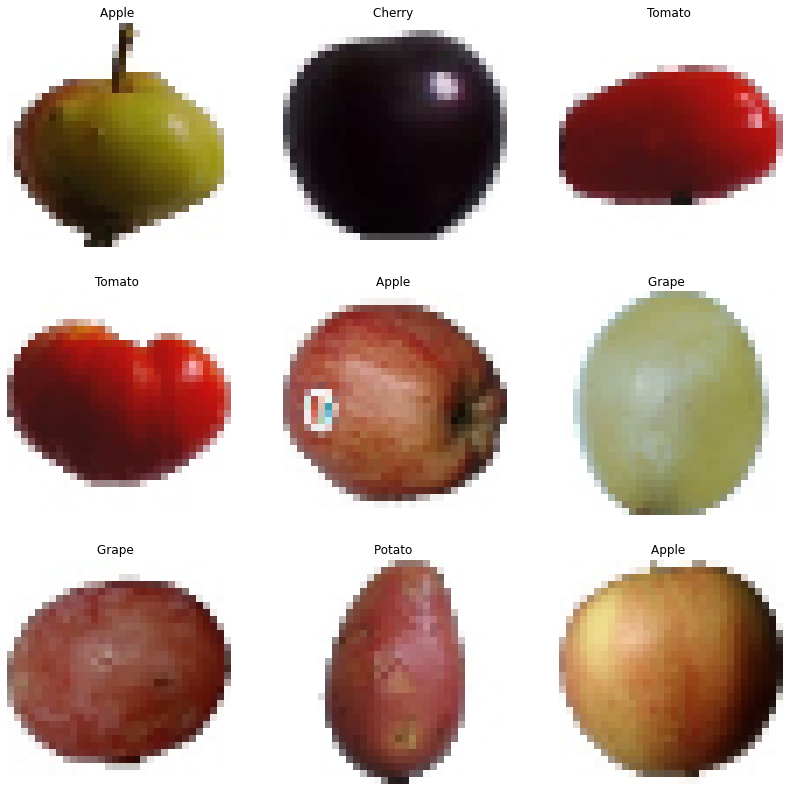

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(14, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i])        
    test_labels_idx = np.argmax(test_labels[i])
    ax.axis('off')
    ax.set(title = f"{type_fruits[test_labels_idx]} ")

In [ ]:
modelFFN1 = tf.keras.Sequential()
modelFFN1.add(Dense(12,input_shape = (32,32, 3), activation='relu'))
modelFFN1.add(Flatten()) 
modelFFN1.add(Dense(10 , activation='sigmoid')) 
modelFFN1.compile(loss ='categorical_crossentropy',optimizer ='adam',metrics =['accuracy'])
modelFFN1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32, 12)        48        
_________________________________________________________________
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                122890    
Total params: 122,938
Trainable params: 122,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyFFN1 = modelFFN1.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 9s 8ms/step - loss: 0.7468 - accuracy: 0.7587 - val_loss: 0.3209 - val_accuracy: 0.8848
Epoch 2/10
1019/1019 [==============================] - 8s 8ms/step - loss: 0.0751 - accuracy: 0.9853 - val_loss: 0.2026 - val_accuracy: 0.9227
Epoch 3/10
1019/1019 [==============================] - 8s 8ms/step - loss: 0.0249 - accuracy: 0.9970 - val_loss: 0.1605 - val_accuracy: 0.9528
Epoch 4/10
1019/1019 [==============================] - 8s 8ms/step - loss: 0.0164 - accuracy: 0.9976 - val_loss: 0.1488 - val_accuracy: 0.9516
Epoch 5/10
1019/1019 [==============================] - 8s 8ms/step - loss: 0.0066 - accuracy: 0.9995 - val_loss: 0.3433 - val_accuracy: 0.9100
Epoch 6/10
1019/1019 [==============================] - 8s 7ms/step - loss: 0.0143 - accuracy: 0.9959 - val_loss: 0.1207 - val_accuracy: 0.9630
Epoch 7/10
1019/1019 [==============================] - 8s 8ms/step - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.1112 - val_accuracy:

In [ ]:
modelFFN1.evaluate(test_images,  test_labels, verbose=2)

341/341 - 1s - loss: 0.1159 - accuracy: 0.9661


[0.115862637758255, 0.9660736918449402]

In [ ]:
def zero_one(pred_labels,test_labels):

    pred_labels_idx = []
    for i in range(len(pred_labels)):
        pred_labels_idx.append(np.argmax(pred_labels[i])) 
    
    test_labels_idx = []
    for i in range(len(test_labels)):
        test_labels_idx.append(np.argmax(test_labels[i]))     

    return zero_one_loss(test_labels_idx, pred_labels_idx)

In [ ]:
pred_labels = modelFFN1.predict(test_images)
zo_lossFFN1 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN1)

Zero one loss:  0.03392627911241519


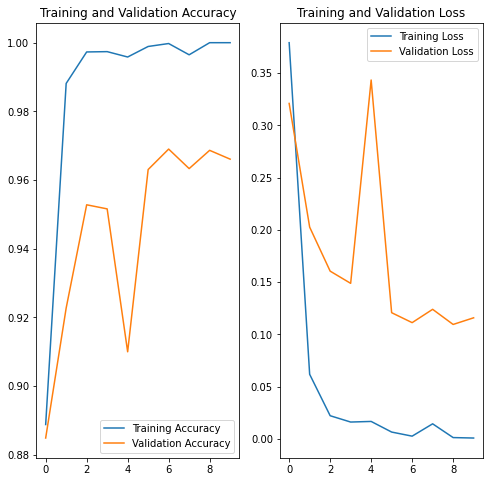

In [ ]:
acc = historyFFN1.history['accuracy']
val_acc = historyFFN1.history['val_accuracy']

loss = historyFFN1.history['loss']
val_loss = historyFFN1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

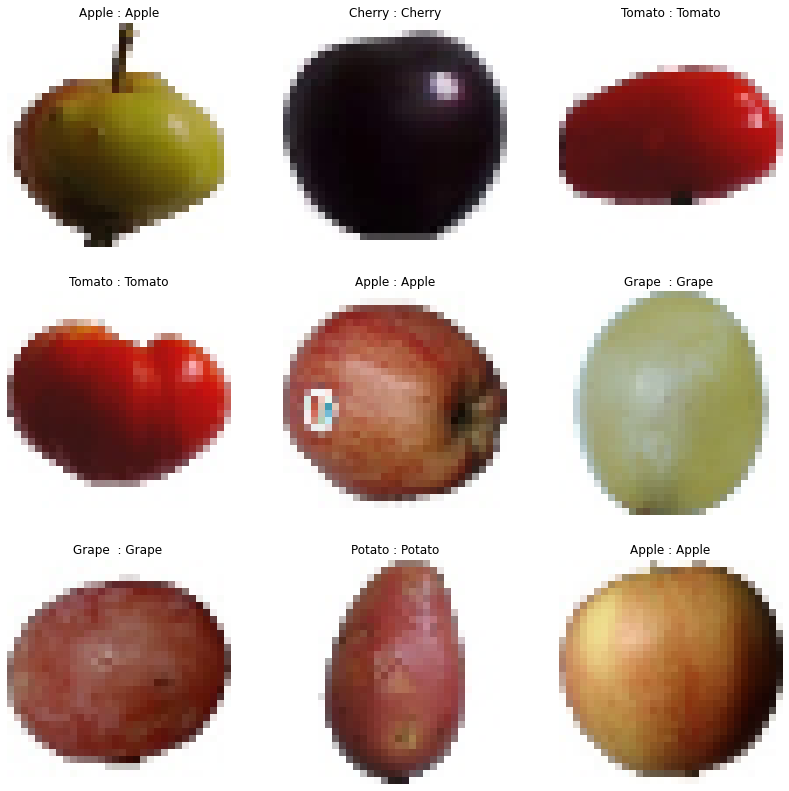

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(14, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(test_images[i])    
    pred_idx = np.argmax(pred_labels[i])
    test_labels_idx = np.argmax(test_labels[i])
    ax.axis('off')
    ax.set(title = f"{type_fruits[test_labels_idx]} : {type_fruits[pred_idx]}")

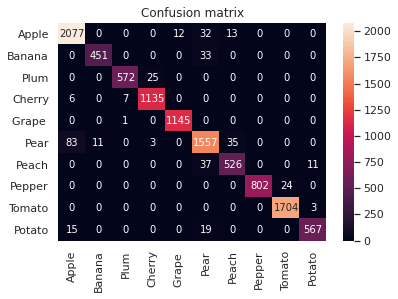

In [ ]:
sn.set(font_scale=1.0)
pred_labels_idx = []
for i in range(len(pred_labels)):
    pred_labels_idx.append(np.argmax(pred_labels[i])) 
    
test_labels_idx = []
for i in range(len(test_labels)):
    test_labels_idx.append(np.argmax(test_labels[i])) 

CM = confusion_matrix(test_labels_idx, pred_labels_idx)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           fmt="d",
           xticklabels=type_fruits, 
           yticklabels=type_fruits, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

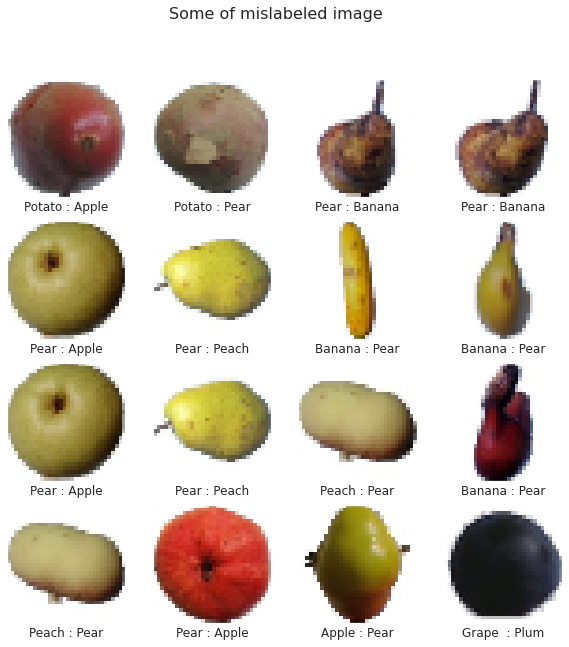

In [ ]:
mislabeled_images_idx =[]

for x in range(len(test_labels_idx)): 
    if(pred_labels_idx[x] != test_labels_idx[x]):
        mislabeled_images_idx.append(x)
#print_mislabeled_images(class_names, test_images, test_labels_idx, y_pred_idx)


fig = plt.figure(figsize=(10,10))
fig.suptitle("Some of mislabeled image", fontsize=16)
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index   =mislabeled_images_idx[i]    
    real    =type_fruits[test_labels_idx[index]]
    predict =type_fruits[pred_labels_idx[index]]
    plt.xlabel(f"{real} : {predict}")
    plt.imshow(test_images[index], cmap=plt.cm.binary)  
plt.show()

In [ ]:
modelFFN2 = tf.keras.Sequential()
modelFFN2.add(Dense(32,input_shape = (32,32, 3), activation='relu'))
modelFFN2.add(Flatten()) 
modelFFN2.add(Dense(10 , activation='sigmoid')) 

modelFFN2.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 
modelFFN2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32, 32, 32)        128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                327690    
Total params: 327,818
Trainable params: 327,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyFFN2= modelFFN2.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 16s 15ms/step - loss: 0.6247 - accuracy: 0.8094 - val_loss: 0.2024 - val_accuracy: 0.9358
Epoch 2/10
1019/1019 [==============================] - 15s 15ms/step - loss: 0.0342 - accuracy: 0.9948 - val_loss: 0.1201 - val_accuracy: 0.9567
Epoch 3/10
1019/1019 [==============================] - 15s 15ms/step - loss: 0.0101 - accuracy: 0.9991 - val_loss: 0.0839 - val_accuracy: 0.9709
Epoch 4/10
1019/1019 [==============================] - 15s 15ms/step - loss: 0.0099 - accuracy: 0.9978 - val_loss: 0.0764 - val_accuracy: 0.9742
Epoch 5/10
1019/1019 [==============================] - 15s 15ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9753
Epoch 6/10
1019/1019 [==============================] - 15s 15ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0612 - val_accuracy: 0.9763
Epoch 7/10
1019/1019 [==============================] - 15s 15ms/step - loss: 7.7339e-04 - accuracy: 1.0000 - val_loss: 0.06

In [ ]:
pred_labels = modelFFN2.predict(test_images)
zo_lossFFN2 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN2)

Zero one loss:  0.02182284980744542


In [ ]:
modelFFN3 = tf.keras.Sequential()
modelFFN3.add(Dense(128,input_shape = (32,32, 3), activation='relu'))
modelFFN3.add(Flatten()) 
modelFFN3.add(Dense(10 , activation='sigmoid')) 
modelFFN3.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 
modelFFN3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32, 32, 128)       512       
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1310730   
Total params: 1,311,242
Trainable params: 1,311,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyFFN3 = modelFFN3.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 52s 51ms/step - loss: 0.6907 - accuracy: 0.8219 - val_loss: 0.1484 - val_accuracy: 0.9462
Epoch 2/10
1019/1019 [==============================] - 52s 51ms/step - loss: 0.0154 - accuracy: 0.9979 - val_loss: 0.0870 - val_accuracy: 0.9708
Epoch 3/10
1019/1019 [==============================] - 51s 50ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 0.0795 - val_accuracy: 0.9719
Epoch 4/10
1019/1019 [==============================] - 52s 51ms/step - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.0661 - val_accuracy: 0.9764
Epoch 5/10
1019/1019 [==============================] - 51s 50ms/step - loss: 5.1389e-04 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9791
Epoch 6/10
1019/1019 [==============================] - 51s 51ms/step - loss: 2.6283e-04 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9787
Epoch 7/10
1019/1019 [==============================] - 52s 51ms/step - loss: 0.0150 - accuracy: 0.9961 - val_loss: 

In [ ]:
pred_labels = modelFFN3.predict(test_images)
zo_lossFFN3 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN3)

Zero one loss:  0.016688061617458283


In [ ]:
modelFFN4 = tf.keras.Sequential()
modelFFN4.add(Dense(512,input_shape = (32,32, 3), activation='relu'))
modelFFN4.add(Flatten()) 
modelFFN4.add(Dense(10 , activation='sigmoid')) 
modelFFN4.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 

modelFFN4.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32, 32, 512)       2048      
_________________________________________________________________
flatten_4 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5242890   
Total params: 5,244,938
Trainable params: 5,244,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyFFN4 = modelFFN4.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 196s 192ms/step - loss: 0.7619 - accuracy: 0.8463 - val_loss: 0.1548 - val_accuracy: 0.9446
Epoch 2/10
1019/1019 [==============================] - 197s 193ms/step - loss: 0.0115 - accuracy: 0.9982 - val_loss: 0.0770 - val_accuracy: 0.9718
Epoch 3/10
1019/1019 [==============================] - 198s 195ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0867 - val_accuracy: 0.9661
Epoch 4/10
1019/1019 [==============================] - 198s 194ms/step - loss: 0.0365 - accuracy: 0.9876 - val_loss: 0.0599 - val_accuracy: 0.9790
Epoch 5/10
1019/1019 [==============================] - 198s 194ms/step - loss: 4.4559e-04 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 0.9818
Epoch 6/10
1019/1019 [==============================] - 197s 193ms/step - loss: 1.9693e-04 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9831
Epoch 7/10
1019/1019 [==============================] - 196s 192ms/step - loss: 1.0119e-04 - accuracy: 1

In [ ]:
pred_labels = modelFFN4.predict(test_images)
zo_lossFFN4 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN4)

Zero one loss:  0.017054832202457404


In [ ]:
modelFFN5 = tf.keras.Sequential()
modelFFN5.add(Dense(256,input_shape = (32,32, 3), activation='relu'))
modelFFN5.add(Flatten()) 
modelFFN5.add(Dense(10 , activation='sigmoid')) 
modelFFN5.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 

modelFFN5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32, 32, 256)       1024      
_________________________________________________________________
flatten_5 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2621450   
Total params: 2,622,474
Trainable params: 2,622,474
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyFFN5 = modelFFN5.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 104s 102ms/step - loss: 8.4601e-05 - accuracy: 1.0000 - val_loss: 0.0384 - val_accuracy: 0.9849
Epoch 2/10
1019/1019 [==============================] - 105s 103ms/step - loss: 5.3606e-05 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9859
Epoch 3/10
1019/1019 [==============================] - 105s 103ms/step - loss: 3.6025e-05 - accuracy: 1.0000 - val_loss: 0.0380 - val_accuracy: 0.9861
Epoch 4/10
1019/1019 [==============================] - 105s 103ms/step - loss: 2.0753e-05 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9882
Epoch 5/10
1019/1019 [==============================] - 104s 103ms/step - loss: 1.3204e-05 - accuracy: 1.0000 - val_loss: 0.0386 - val_accuracy: 0.9865
Epoch 6/10
1019/1019 [==============================] - 104s 102ms/step - loss: 1.0172e-05 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9854
Epoch 7/10
1019/1019 [==============================] - 105s 103ms/step - loss: 5.3462e-

In [ ]:
pred_labels = modelFFN5.predict(test_images)
zo_lossFFN5 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN5)

Zero one loss:  0.017880066018705287


In [ ]:
modelFFN21 = tf.keras.Sequential()
modelFFN21.add(Dense(32,input_shape = (32,32, 3), activation='relu'))
modelFFN21.add(Flatten()) 
modelFFN21.add(Dense(32 , activation='relu'))
modelFFN21.add(Dense(10 , activation='sigmoid')) 

  
modelFFN21.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 

modelFFN21.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32, 32, 32)        128       
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1048608   
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 1,049,066
Trainable params: 1,049,066
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyFFN21 = modelFFN21.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 22s 21ms/step - loss: 1.5510 - accuracy: 0.4304 - val_loss: 0.9983 - val_accuracy: 0.6735
Epoch 2/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.6241 - accuracy: 0.8008 - val_loss: 0.8048 - val_accuracy: 0.7330
Epoch 3/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.3801 - accuracy: 0.8909 - val_loss: 0.6996 - val_accuracy: 0.7755
Epoch 4/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.2613 - accuracy: 0.9286 - val_loss: 0.5859 - val_accuracy: 0.8037
Epoch 5/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.1869 - accuracy: 0.9496 - val_loss: 0.4808 - val_accuracy: 0.8421
Epoch 6/10
1019/1019 [==============================] - 22s 21ms/step - loss: 0.1268 - accuracy: 0.9679 - val_loss: 0.4531 - val_accuracy: 0.8548
Epoch 7/10
1019/1019 [==============================] - 22s 21ms/step - loss: 0.0895 - accuracy: 0.9774 - val_loss: 0.4076 -

In [ ]:
pred_labels = modelFFN21.predict(test_images)
zo_lossFFN21 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN21)

Zero one loss:  0.15716119567210707


In [ ]:
modelFFN22 = tf.keras.Sequential()
modelFFN22.add(Dense(32,input_shape = (32,32, 3), activation='relu'))
modelFFN22.add(Flatten()) 
modelFFN22.add(Dense(32 , activation='relu'))
modelFFN22.add(Dense(32 , activation='relu'))
modelFFN22.add(Dense(10 , activation='sigmoid')) 

  
modelFFN22.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 

modelFFN22.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 32, 32, 32)        128       
_________________________________________________________________
flatten_8 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1048608   
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 1,050,122
Trainable params: 1,050,122
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyFFN22 = modelFFN22.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 21s 20ms/step - loss: 1.0528 - accuracy: 0.6314 - val_loss: 0.3872 - val_accuracy: 0.8591
Epoch 2/10
1019/1019 [==============================] - 22s 21ms/step - loss: 0.1522 - accuracy: 0.9565 - val_loss: 0.2870 - val_accuracy: 0.9013
Epoch 3/10
1019/1019 [==============================] - 22s 21ms/step - loss: 0.0662 - accuracy: 0.9822 - val_loss: 0.2487 - val_accuracy: 0.9229
Epoch 4/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.0327 - accuracy: 0.9918 - val_loss: 0.1906 - val_accuracy: 0.9439
Epoch 5/10
1019/1019 [==============================] - 22s 21ms/step - loss: 0.0208 - accuracy: 0.9946 - val_loss: 0.1630 - val_accuracy: 0.9517
Epoch 6/10
1019/1019 [==============================] - 22s 22ms/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 0.1661 - val_accuracy: 0.9548
Epoch 7/10
1019/1019 [==============================] - 22s 22ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.2298 -

In [ ]:
pred_labels = modelFFN22.predict(test_images)
zo_lossFFN22 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN22)

Zero one loss:  0.038877682009902825


In [ ]:
modelFFN23 = tf.keras.Sequential()
modelFFN23.add(Dense(32,input_shape = (32,32, 3), activation='relu'))
modelFFN23.add(Flatten()) 
modelFFN23.add(Dense(32 , activation='relu'))
modelFFN23.add(Dense(32 , activation='relu'))
modelFFN23.add(Dense(32 , activation='relu'))
modelFFN23.add(Dense(10 , activation='sigmoid')) 

  
modelFFN23.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 

modelFFN23.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32, 32, 32)        128       
_________________________________________________________________
flatten_9 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1048608   
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                330       
Total params: 1,051,178
Trainable params: 1,051,178
Non-trainable params: 0
____________________________________________

In [ ]:
historyFFN23 = modelFFN23.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 21s 20ms/step - loss: 0.9427 - accuracy: 0.6836 - val_loss: 0.3466 - val_accuracy: 0.8824
Epoch 2/10
1019/1019 [==============================] - 21s 20ms/step - loss: 0.0632 - accuracy: 0.9830 - val_loss: 0.1859 - val_accuracy: 0.9429
Epoch 3/10
1019/1019 [==============================] - 21s 20ms/step - loss: 0.0199 - accuracy: 0.9951 - val_loss: 0.1333 - val_accuracy: 0.9554
Epoch 4/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.0135 - accuracy: 0.9966 - val_loss: 0.1283 - val_accuracy: 0.9594
Epoch 5/10
1019/1019 [==============================] - 22s 22ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1966 - val_accuracy: 0.9395
Epoch 6/10
1019/1019 [==============================] - 22s 21ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0989 - val_accuracy: 0.9673
Epoch 7/10
1019/1019 [==============================] - 22s 22ms/step - loss: 1.8936e-04 - accuracy: 1.0000 - val_loss: 0.10

In [ ]:
pred_labels = modelFFN23.predict(test_images)
zo_lossFFN23 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN23)

Zero one loss:  0.030992114432422557


In [ ]:
modelFFN24 = tf.keras.Sequential()
modelFFN24.add(Dense(32,input_shape = (32,32, 3), activation='relu'))
modelFFN24.add(Flatten()) 
modelFFN24.add(Dense(32 , activation='relu'))
modelFFN24.add(Dense(32 , activation='relu'))
modelFFN24.add(Dense(32 , activation='relu'))
modelFFN24.add(Dense(10 , activation='sigmoid')) 

  
modelFFN24.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 

modelFFN24.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32, 32, 32)        128       
_________________________________________________________________
flatten_10 (Flatten)         (None, 32768)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1048608   
_________________________________________________________________
dense_29 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 1,051,178
Trainable params: 1,051,178
Non-trainable params: 0
___________________________________________

In [ ]:
pred_labels = modelFFN24.predict(test_images)
zo_lossFFN24 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossFFN24)

Zero one loss:  0.9405831652301485


In [ ]:
modelCNN1 = tf.keras.Sequential()
modelCNN1.add(Conv2D(32, (3, 3), 
          activation='relu', input_shape=(32, 32, 3)))
modelCNN1.add(MaxPooling2D((2, 2)))
modelCNN1.add(Flatten()) 
modelCNN1.add(Dense(10 , activation='sigmoid')) 
  
modelCNN1.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 
modelCNN1.summary()



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 7200)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                72010     
Total params: 72,906
Trainable params: 72,906
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyCNN1 = modelCNN1.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 22s 21ms/step - loss: 0.7632 - accuracy: 0.7527 - val_loss: 0.3154 - val_accuracy: 0.8884
Epoch 2/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.0665 - accuracy: 0.9867 - val_loss: 0.1633 - val_accuracy: 0.9413
Epoch 3/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.0188 - accuracy: 0.9978 - val_loss: 0.1406 - val_accuracy: 0.9532
Epoch 4/10
1019/1019 [==============================] - 22s 21ms/step - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.5152 - val_accuracy: 0.8833
Epoch 5/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.0195 - accuracy: 0.9948 - val_loss: 0.1313 - val_accuracy: 0.9542
Epoch 6/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.1318 - val_accuracy: 0.9581
Epoch 7/10
1019/1019 [==============================] - 21s 21ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.1310 -

In [ ]:
pred_labels = modelCNN1.predict(test_images)
zo_lossCNN1 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossCNN1)

Zero one loss:  0.03181734824867044


In [ ]:
modelCNN2 = tf.keras.Sequential()
modelCNN2.add(Conv2D(32, (3, 3), 
          activation='relu', input_shape=(32, 32, 3)))
modelCNN2.add(Conv2D(32, (3, 3),activation='relu'))
modelCNN2.add(MaxPooling2D((2, 2)))
modelCNN2.add(Flatten()) 
modelCNN2.add(Dense(10 , activation='sigmoid')) 
  
modelCNN2.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 
modelCNN2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                62730     
Total params: 72,874
Trainable params: 72,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyCNN2 = modelCNN2.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 75s 74ms/step - loss: 0.6354 - accuracy: 0.7880 - val_loss: 0.1792 - val_accuracy: 0.9354
Epoch 2/10
1019/1019 [==============================] - 76s 74ms/step - loss: 0.0190 - accuracy: 0.9949 - val_loss: 0.1234 - val_accuracy: 0.9632
Epoch 3/10
1019/1019 [==============================] - 76s 75ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0878 - val_accuracy: 0.9697
Epoch 4/10
1019/1019 [==============================] - 75s 74ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0781 - val_accuracy: 0.9756
Epoch 5/10
1019/1019 [==============================] - 75s 74ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0814 - val_accuracy: 0.9757
Epoch 6/10
1019/1019 [==============================] - 76s 75ms/step - loss: 1.2344e-04 - accuracy: 1.0000 - val_loss: 0.0729 - val_accuracy: 0.9796
Epoch 7/10
1019/1019 [==============================] - 75s 74ms/step - loss: 5.7844e-05 - accuracy: 1.0000 - val_loss: 

In [ ]:
pred_labels = modelCNN2.predict(test_images)
zo_lossCNN2 = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossCNN2)

Zero one loss:  0.047130020172382214


In [ ]:
base_model=VGG16(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

modelVGG16=Model(inputs=base_model.input,outputs=preds)
modelVGG16.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
modelVGG16.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 

historyVGG16= modelVGG16.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
 344/1019 [=========>....................] - ETA: 41:27 - loss: 2.0186 - accuracy: 0.2588

KeyboardInterrupt: ignored

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #impo
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

modelMobileNet=Model(inputs=base_model.input,outputs=preds)

modelMobileNet.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 
modelMobileNet.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0   

In [ ]:
historyMobileNet = modelMobileNet.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 438s 428ms/step - loss: 0.6193 - accuracy: 0.8193 - val_loss: 0.4132 - val_accuracy: 0.9224
Epoch 2/10
1019/1019 [==============================] - 435s 427ms/step - loss: 0.1929 - accuracy: 0.9605 - val_loss: 0.1379 - val_accuracy: 0.9608
Epoch 3/10
1019/1019 [==============================] - 433s 425ms/step - loss: 0.1333 - accuracy: 0.9727 - val_loss: 0.6598 - val_accuracy: 0.8707
Epoch 4/10
1019/1019 [==============================] - 440s 432ms/step - loss: 0.0971 - accuracy: 0.9811 - val_loss: 0.1407 - val_accuracy: 0.9645
Epoch 5/10
1019/1019 [==============================] - 438s 430ms/step - loss: 0.0959 - accuracy: 0.9821 - val_loss: 0.0547 - val_accuracy: 0.9866
Epoch 6/10
1019/1019 [==============================] - 427s 419ms/step - loss: 0.0999 - accuracy: 0.9813 - val_loss: 0.6266 - val_accuracy: 0.8489
Epoch 7/10
1019/1019 [==============================] - 429s 421ms/step - loss: 0.1707 - accuracy: 0.9724 - val_

In [ ]:
pred_labels = modelMobileNet.predict(test_images)
zo_lossMobileNet = zero_one(pred_labels,test_labels)
print("Zero one loss: ",zo_lossMobileNet)

Zero one loss:  0.04722171281863197


In [ ]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

modelResNet50 = tf.keras.Sequential()
modelResNet50.add(resnet_model)
modelResNet50.add(GlobalAveragePooling2D())
modelResNet50.add(Dense(10, activation='softmax'))
  
modelResNet50.compile(loss ='categorical_crossentropy', 
                     optimizer ='adam', 
                   metrics =['accuracy']) 
modelResNet50.summary()


94773248/94765736 [==============================] - 2s 0us/step
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:

historyResNet50 = modelResNet50.fit(train_images, train_labels, epochs=10
          ,validation_data=(test_images, test_labels) )

Epoch 1/10
1019/1019 [==============================] - 2305s 2s/step - loss: 0.8542 - accuracy: 0.8064 - val_loss: 0.4772 - val_accuracy: 0.8461
Epoch 2/10
1019/1019 [==============================] - 2295s 2s/step - loss: 0.2567 - accuracy: 0.9510 - val_loss: 0.1925 - val_accuracy: 0.9444
Epoch 3/10
 349/1019 [=========>....................] - ETA: 25:03 - loss: 0.3057 - accuracy: 0.9280